# Python notebook sample #1

**How to draw time-series plot ?**
1. Python iris
2. iPython
3. Python notebook 

**Python source code**
- 아래 참고

|Name|Description|age|
|:-|:-|:-:|
|Mary |she is a nice girl.|20|

In [1]:
%run whatismystash.py

Input stash num or variable name, ex) m01s00i032 or 032 or 1s00i03 or SEA ICE
 >>   


In [3]:
# 모듈 로드
import iris
import iris.coord_categorisation
import matplotlib
import matplotlib.pyplot as plt
import iris.plot as iplt
import pandas as pd
import numpy as np

# 평균 계산 함수
def cal_wgtd_mean(cube):
    cube.coord('latitude').guess_bounds()
    cube.coord('longitude').guess_bounds()
    weight = iris.analysis.cartography.area_weights(cube)
    wgtd_mean = cube.collapsed(['latitude','longitude'], iris.analysis.MEAN, weights = weight)
    return wgtd_mean

# 파일 로드
path = "/Users/sainy/Documents/Data/*.pm*"
cubes = iris.load(path, iris.AttributeConstraint(STASH="m01s03i236"))
cube = cubes[0]
unit = cube.units

# 전지구 시계열 평균
global_mean = cal_wgtd_mean(cube)
 #regional = cube.intersection(latitude=(10,50),longitude=(110,150))
 #regioanl_mean = cal_wgtd_mean(regional)

# 공간 평균
dist_mean = cube.collapsed('time', iris.analysis.MEAN)

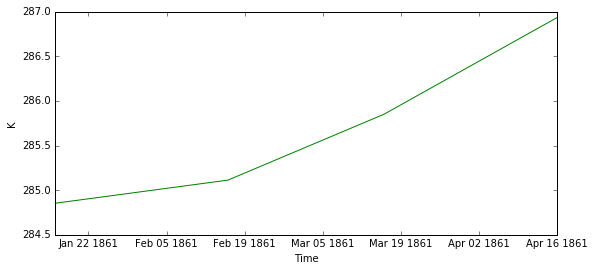

In [7]:
# 시계열 그림
plt.figure(figsize=(9,4))
iplt.plot(global_mean, color='green', lw=1)
plt.ylabel(unit)
plt.xlabel('Time')
plt.show()

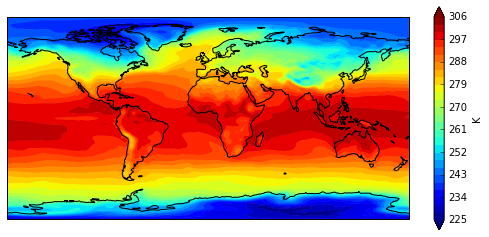

In [5]:
# 공간분포 그림
plt.figure(figsize=(9,4))
iplt.contourf(dist_mean, 30, extend='both')
cbar = plt.colorbar(orientation='vertical')
cbar.set_label(unit)
plt.gca().coastlines()
plt.show()